In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nx = 40
ny = nx

X, Y = np.meshgrid(np.linspace(0,1,nx), np.linspace(0,1,ny))
pp = np.vstack([X.reshape(-1), Y.reshape(-1)]).T.copy()
N = pp.shape[0]

$$G_{ij} = \exp\left(\frac{1}{2}\frac{\|p_i - p_j\|^2}{\sigma^2}\right)$$

In [3]:
def make_gaussian_kernel(sigma):
    G = np.zeros((N,N))
    for k in range(N):
        G[:,k] = np.exp(-0.5*(np.linalg.norm(pp - pp[k,:], axis=1)/sigma)**2)
    return G

Text(0.5, 0, '$i$')

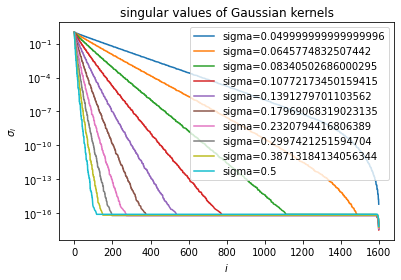

In [4]:
sigmas = np.logspace(np.log10(0.05), np.log10(0.5), 10)

all_ss = list()
for sigma in sigmas:
    G = make_gaussian_kernel(sigma)

    _,ss,_ = np.linalg.svd(G)
    all_ss.append(ss/np.max(ss))
    
plt.figure()
for sigma, ss in zip(sigmas, all_ss):
    plt.semilogy(ss)
plt.legend(['sigma='+str(sigma) for sigma in sigmas])
plt.title('singular values of Gaussian kernels')
plt.ylabel(r'$\sigma_i$')
plt.xlabel(r'$i$')

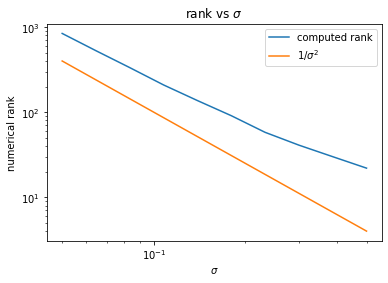

In [5]:
rank_truncation_tol = 1e-5

all_ranks = [np.argwhere(ss < rank_truncation_tol)[0][0] for ss in all_ss]

plt.loglog(sigmas, all_ranks)
plt.loglog(sigmas, 1./np.array(sigmas)**2) # (l/L)^d
plt.title(r'rank vs $\sigma$')
plt.xlabel(r'$\sigma$')
plt.ylabel('numerical rank')
plt.legend(['computed rank', r'$1/\sigma^2$'])

Text(0.5, 0, '$i$')

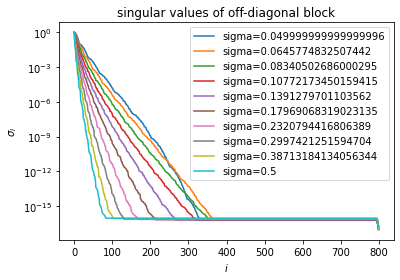

In [6]:
all_ss_block = list()
for sigma in sigmas:
    G = make_gaussian_kernel(sigma)
    G_block = G[:int(N/2), int(N/2):]
    
    _,ss,_ = np.linalg.svd(G_block)
    all_ss_block.append(ss/np.max(ss))
    
plt.figure()
for sigma, ss in zip(sigmas, all_ss_block):
    plt.semilogy(ss)
plt.legend(['sigma='+str(sigma) for sigma in sigmas])
plt.title('singular values of off-diagonal block')
plt.ylabel(r'$\sigma_i$')
plt.xlabel(r'$i$')

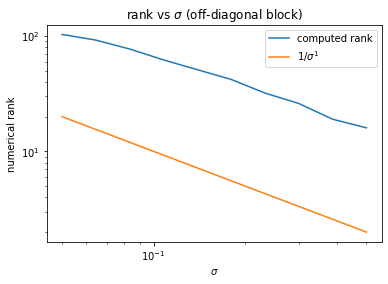

In [7]:
all_ranks_block = [np.argwhere(ss < 1e-5)[0][0] for ss in all_ss_block]

plt.loglog(sigmas, all_ranks_block)
plt.loglog(sigmas, 1./np.array(sigmas)**1) # (l/L)^(d-1)
plt.title(r'rank vs $\sigma$ (off-diagonal block)')
plt.xlabel(r'$\sigma$')
plt.ylabel('numerical rank')
plt.legend(['computed rank', r'$1/\sigma^1$'])